# Fundamental NLP Projects

### Stan Liu

#### 25/12/2018

- #### 1.Introduction
- #### 2.Data Preparation
    - 2.1 Load necessary packages
    - 2.2 Load data 
- #### 3.Trump Speech Analysis
    - 3.1 Remove punctuations
    - 3.2 Tokenize the word
    - 3.3 Frequency distribution analysis
    - 3.4 Lexical diversity exploration
- #### 4.Amazon Review Analysis
    - 4.1 Data exploration and drop the null value
    - 4.2 Construct labels and inputs
    - 4.3 Remove puncuation and stop words
    - 4.4 Stemming and Lemmatization
    - 4.5 Check the distribution of inputs and labels
    - 4.6 Construct the models

## 1. Introduction

 - This project is a entry level NLP practive projects, which aims at simple text precessing and analysis. Here we mainly use NLTK package to do tokenization, stopwords removing. In the analysis of Amazon Review, we construct a corpus and construct models to do the sentiment classification.

## 2.Data preparation

### 2.1 Load data and packages

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn as sk
import os,time,re,string
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics


import string
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk import ngrams

### 2.2 Load data

First we import the trump.txt. This document is the from one of his campaign.

In [2]:
with open('trump.txt', encoding = 'utf-8') as f:
    trump = f.read()

Then we import all amazon reviews

In [3]:
review_raw = pd.read_csv('./amazon-fine-food-reviews/Reviews.csv')

## 3.Trump Speech Analysis

### 3.1 Remove all punctuations
- First we need to remove all punctuations

In [4]:
# Define a function to remove all punctuations
trantable = str.maketrans("","",string.punctuation)
def data_clean(text):
    text = text.lower()
    text_clean = text.translate(trantable)
    return text_clean

In [6]:
trump = data_clean(trump)

In [7]:
trump

'ronald reagan building and international trade center\n\nwashington dc\n\n203 pm est\n\nthe president  thank you very much  thank you  please  i want to thank vice president pence along with the many members of my cabinet here with us today\n\ni also want to thank all of the dedicated professionals — military civilian and law enforcement — who devote their lives to serving our nation  in particular i want to recognize general dunford and the members of the joint chiefs of staff  thank you thank you thank you  applause\n\nin addition we are honored to be joined by house majority leader kevin mccarthy homeland security chairman mike mccaul and senate majority whip john cornyn  thank you very much  thank you for being here  thank you  thank you  applause\n\nlet me begin by expressing our deepest sympathies and most heartfelt prayers for the victims of the train derailment in washington state  we are closely monitoring the situation and coordinating with local authorities  it is all the m

### 3.2 Tokenize the word

In [8]:
tokens = nltk.word_tokenize(trump)

 - Then we transform the token object into an nltk Text object in order to apply methods

In [58]:
tokens2 = [word for word in tokens if word not in stopwords.words('english')]

In [67]:
# Here we create a Text object with stopwords moved 
text2 = nltk.Text(tokens2)

In [72]:
# Here we creat another Text object with sropwords reamining
text = nltk.Text(tokens)

### 3.3 Frequency distribution analysis 
 - We can draw distrubution of key words

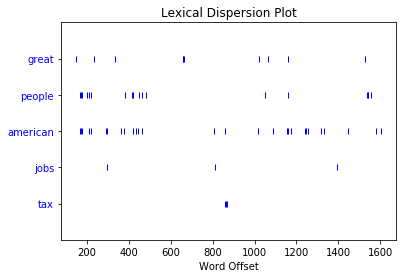

In [68]:
text2.dispersion_plot(['great','people','american','jobs','tax'])

From here we can see the word "american" and "people" appears quite frequently in his speech, while critical key words like "jobs" or "tax", which is highly related to his political view, is quite sparse.

 - Also, we can testify the most frequent collocations

In [69]:
text2.collocations()

united states; thank thank; since election; national security;
american people; alltime high; men women; middle east; stock market;
taken care; north korea; american greatness; economic political;
failures past; made clear; supposed work; serve citizens; applause
thank; coming back; fair share


 - Calculate word frequency

In [70]:
text_fq = nltk.FreqDist(text2)
text_fq.most_common(10)

[('american', 28),
 ('thank', 24),
 ('—', 20),
 ('america', 20),
 ('strategy', 20),
 ('people', 18),
 ('nation', 17),
 ('applause', 17),
 ('world', 15),
 ('new', 14)]

 - Cumulative chart of high words with high frequency

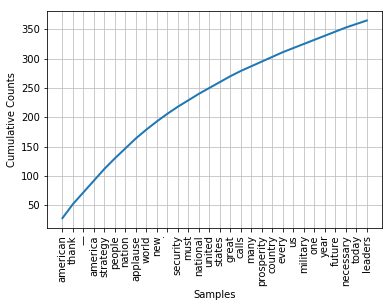

In [71]:
text_fq.plot(30,cumulative=True)

### 3.4 Lexical diversity exploration
- Also, we can culculate the lexical diversity between trump and others

In [14]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [15]:
lexical_diversity(text)

0.31968

Here we find, in average, in 100 words, Trump will use about 32 different words in his speech. This ratio is a little bit higher comparaed with Jane Austen's works and all speechs divered by presidents of the United States in the history. (diversity of other sources can be checked by downloading the innate package in nltk and doing the same analysis) . 

However we should be aware of one fact that, generally speaking, there will be a diminishing trend in the lexical diversity when passage becomes longer. This is not surprising, since the word domain is nearly fixed, which means the more word one use, the less word one can choose. Moreover, the frequency of word is even, some words (like all stop words), must appear in a passage much more often than others.

## 4.Amazon Review Analysis

### 4.1 Data exploration
- We can first look through the reviews

In [16]:
review_raw.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
review_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


 - We first do data preprocessing. Drop all the null value

In [18]:
review = review_raw.dropna()

### 4.2 Construct labels and inputs

#### Binarize the review score.
- For all review where score > 3, we label it with "positive"
- For all review where score <= 3, we label it with "neigative"

In [19]:
label = review['Score'].apply(lambda x:1 if x>3 else 0)

#### Pick out the summary column

In [20]:
summary = review['Summary']

In [21]:
summary.head(5)

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

### 4.3 Remove puncuation and stop words

#### Remove all the punctuation

In [22]:
#对summary执行data_clearn操作
summary = summary.apply(lambda x: data_clean(x))

In [23]:
summary.head(5)

0    good quality dog food
1        not as advertised
2      delight says it all
3           cough medicine
4              great taffy
Name: Summary, dtype: object

#### Tokenize the message

In [24]:
corpus_w_stopword = [nltk.word_tokenize(text) for text in summary]

In [25]:
corpus_w_stopword[:5]

[['good', 'quality', 'dog', 'food'],
 ['not', 'as', 'advertised'],
 ['delight', 'says', 'it', 'all'],
 ['cough', 'medicine'],
 ['great', 'taffy']]

 #### Remove the stop words


Here we must pay attention to one thing:
   - Some negative words shouldn't be removed. Otherwise, the emotion analysis may have huge bias. (e.g. "I'm happy" versus "I'm not happy." )
   - Here we adopt a method: if there's a "not" before an adjective, we just link "not" to the word with a "\_" (e.g. "not happy" → "not_happy")

In [27]:
for subcorpus in corpus_w_stopword:
    for i,word in enumerate(subcorpus):
        if word == 'not' and i != (len(subcorpus)-1):
            temp = word
            subcorpus.append(temp + '_' + subcorpus[i+1])

 - Now we can define the function to remove stop words

In [28]:
def remove_stopword(text):
    return [word for word in text if word not in stopwords.words('english')]

- Construct a new corpus

In [29]:
corpus_wo_stopword = [remove_stopword(text) for text in corpus_w_stopword]

In [30]:
corpus_wo_stopword[:5]

[['good', 'quality', 'dog', 'food'],
 ['advertised', 'not_as'],
 ['delight', 'says'],
 ['cough', 'medicine'],
 ['great', 'taffy']]

 - Check the proportion of real words:

In [31]:
corpus_wo_h = np.hstack(corpus_wo_stopword)
corpus_w_h = np.hstack(corpus_w_stopword)

print("The proportion of real words is {:5f}".format(len(set(corpus_wo_h))/len(set(corpus_w_h))))

The proportion of real words is 0.996924


This is a good news, which means that by doing the basic cleansing process, which just contains the stopword removing, we didn't lost much information about the comments. This can be helpful when we try to analyze the sentiment in the following part

### 4.4 Stemming and Lemmatization
  - Here we compare two kinds of words transformation method

In [32]:
porter = PorterStemmer()
wnl = WordNetLemmatizer()

In [34]:
stem_wo = [porter.stem(word) for word in corpus_wo_h]
lem_wo = [wnl.lemmatize(word) for word in corpus_wo_h]

 - Print the outcome of these two versions

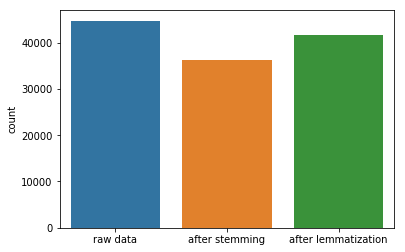

In [85]:
plt.figure(figsize=(6,4))
sns.barplot(x = ['raw data','after stemming', 'after lemmatization'], 
            y = [len(set(corpus_wo_h)), len(set(stem_wo)), len(set(lem_wo))]) 
plt.ylabel('count')
plt.show()

 - Consider the method ot Stemming and Lemmatization, we adopt Lemmatization to obtain a raw corpus without too much information loss

### 4.5 Check the distribution of inputs and labels

 - Calculate the frequency of the heat words

In [36]:
fdist_wo = pd.DataFrame(list(FreqDist(lem_wo).items()),columns = ['Words', 'Frequency'])
fdist_wo.sort_values(by = 'Frequency', inplace = True, ascending = False)

In [37]:
fdist_wo.head(5)

,Words,Frequency
10,great,72618
0,good,51567
25,love,35733
20,best,33370
148,coffee,25113


In [38]:
#First we define a function to get ngram list for a word series

def get_ngrams(text, n = 2):
    return ngrams(text, n)

In [39]:
bigram_wo = []
for token in corpus_wo_stopword:
    bigram = nltk.bigrams(token)
    for item in bigram:
        bigram_wo.append(item)
        
bigram_wo[:5]

[('good', 'quality'),
 ('quality', 'dog'),
 ('dog', 'food'),
 ('advertised', 'not_as'),
 ('delight', 'says')]

In [40]:
bifq = FreqDist(bigram_wo)

bifq.most_common(10)

[(('great', 'product'), 7087),
 (('great', 'taste'), 3441),
 (('great', 'coffee'), 3180),
 (('great', 'price'), 3119),
 (('dogs', 'love'), 2876),
 (('dog', 'food'), 2856),
 (('good', 'stuff'), 2799),
 (('dog', 'loves'), 2756),
 (('gluten', 'free'), 2661),
 (('good', 'product'), 2278)]

 - Sort the value and print it out

In [41]:
bi_fd_wo = pd.DataFrame(list(bifq.items()), columns=['bi_wo', 'bicounts_wo'])
bi_fd_wo.sort_values(by = 'bicounts_wo', inplace = True, ascending = False)

bi_fd_wo.head(5)

,bi_wo,bicounts_wo
285,"(great, product)",7087
70,"(great, taste)",3441
1261,"(great, coffee)",3180
369,"(great, price)",3119
162,"(dogs, love)",2876


- Finally we may visualize the frenquency in a bar plot

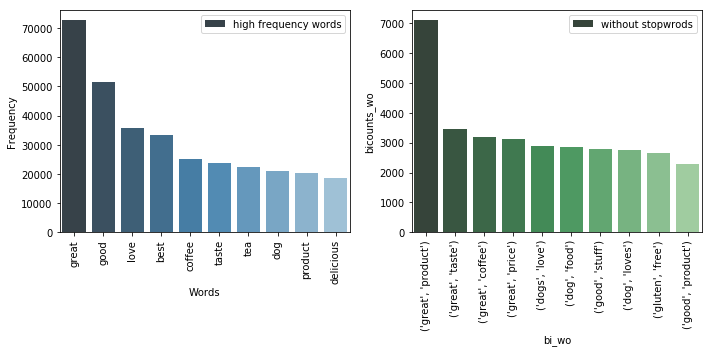

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey = False , figsize = (10,5))

sns.barplot(x = fdist_wo['Words'][:10],
            y = fdist_wo['Frequency'][:10], 
            palette='Blues_d',
            ax = ax1, 
            label = 'high frequency words') 

sns.barplot(x = bi_fd_wo['bi_wo'][:10],
            y =bi_fd_wo['bicounts_wo'][:10], 
            palette='Greens_d', 
            ax = ax2, 
            label = 'without stopwrods') 

ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=90)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=90)


ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

- Check the distribution of the comments

In [79]:
len(label[label == 0])/len(label)

0.2192867484971262

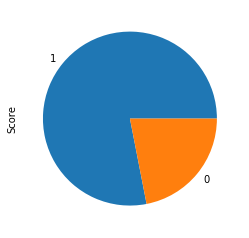

In [86]:
label.value_counts().plot(kind = 'pie')

 - Here we can find the words has quite distinguishing characteristics, most of them contains signal words like "good" or "great" or "best". 
 - Also, we can find the bigram model shows the heatest phrases contain positive comments from different aspects of the goods (e.g. "great product" is a general comment on the hole product; "great taste" is the positive comment on the taste; "great price" is the positive comment on the price of the goods.)
 - Finally, by checkingthe label, we find this is an imbalanced problem, which is worthy paying attention to when we construct the model. 

### 4.6 Construct the models

- Define preprocessing functions

In [43]:
def lemmatize_tokens(tokens, wnl = WordNetLemmatizer()):
    lemmatized = []
    for item in tokens:
        lemmatized.append(wnl.lemmatize(item))
    return lemmatized

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatization = lemmatize_tokens(tokens)
    return ' '.join(lemmatization)

def build_corpus(dataset):
    corpus = []
    for text in dataset:
        # without the decoding, there will be UnicodeDecodeError when tokenizing
        corpus.append(tokenize(text))  
    return corpus

 - Split training and testing set

In [44]:
X = summary
y = label

In [45]:
seed = 2018
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [46]:
train_token = build_corpus(X_train)
test_token = build_corpus(X_test)

In [47]:
train_token[:10]

['astringent sour',
 'three cat love',
 '',
 'pretty good decaf',
 'taste great',
 'fav',
 'lemon heaven',
 'best natural gum around imo',
 'balsamic vinagrette dressing',
 'good price quantity']

- Vectorize the tokens

In [48]:
tfidf_vec = TfidfVectorizer()

In [49]:
X_train_tfidf_vec = tfidf_vec.fit_transform(train_token)
X_test_tfidf_vec = tfidf_vec.transform(test_token)

 - Check the tfidf vector

In [50]:
print('The shape of X_train_tfidf is : {}'.format(X_train_tfidf_vec.shape))
print('Some words as features in the space : {}'.format(tfidf_vec.get_feature_names())[:10])

The shape of X_train_tfidf is : (454728, 35419)
Some words


 - Set all the trial models and hyperparameters

In [54]:
models = {}

models['lgr'] = LogisticRegression(
    C=2.0,
    solver = 'liblinear',
    penalty = 'l1')

models['svm'] = SVC(
    kernel='linear', 
    C=2.0 )

models['nb'] = MultinomialNB()

models['xgb'] = xgb.XGBClassifier(
    #learning_rate = 0.02,
    n_estimators= 2000,
    max_depth= 4,
    min_child_weight= 2,
    gamma=0.9,                        
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread= -1,
    scale_pos_weight=1)

 - Train the model and test the performance

In [55]:
results = pd.DataFrame(index = models.keys(), columns=['f1_score','precision_score','recall_score','auc'])

for (clf_name, clf) in models.items():
    clf.fit(X_train_tfidf_vec, y_train)
    ypred = clf.predict(X_test_tfidf_vec)
    f1score = metrics.f1_score(y_test, ypred)
    precision = metrics.precision_score(y_test, ypred)
    recall = metrics.recall_score(y_test, ypred)
    auc = metrics.roc_auc_score(y_test, ypred)
    results.loc[clf_name,:] = [f1score, precision, recall, auc]

In [56]:
results

,f1_score,precision_score,recall_score,auc
lgr,0.924806,0.892333,0.959733,0.773696
svm,0.922886,0.888668,0.959845,0.765829
nb,0.918757,0.869187,0.974323,0.726089
xgb,0.922353,0.873392,0.977129,0.736378
